# Chapter 14 - Going Deeper: The Mechanics of TensorFlow


- [TensorFlow in a nutshell](#TensorFlow-in-a-nutshell)
- [Understanding TensorFlow's computation graphs](#Understanding-TensorFlow's-computation-graphs)
- [Working with TensorFlow’s placeholders, variables, and operations](#Working-with-TensorFlow’s-placeholders,-variables,-and-operations)
  - [Using placeholders for feeding data as input to a model in TensorFlow](#Using-placeholders-for-feeding-data-as-input-to-a-model-in-TensorFlow)
    - [Defining placeholders](#Defining-placeholders)
    - [Feeding placeholders with data](#Feeding-placeholders-with-data)
    - [Defining placeholders for data arrays with varying batchsizes](#Defining-placeholders-for-data-arrays-with-varying-batchsizes)
  - [Variables in TensorFlow](#Variables-in-TensorFlow)
    - [Defining variables](#Defining-variables)
    - [Initializing variables](#Initializing-variables)
    - [Variable scope](#Variable-scope)
    - [Reusing variables](#Reusing-variables)
  - [Building a regression model](#Building-a-regression-model)
  - [Executing objects in a TensorFlow graph using their names](#Executing-objects-in-a-TensorFlow-graph-using-their-names)
- [Saving and restoring a model in TensorFlow](#Saving-and-restoring-a-model-in-TensorFlow)
- [Transforming Tensors as multidimensional data arrays](#Transforming-Tensors-as-multidimensional-data-arrays)
- [Utilizing control flow mechanics in building graphs](#Utilizing-control-flow-mechanics-in-building-graphs)
- [Visualizing the graph with TensorBoard](#Visualizing-the-graph-with-TensorBoard)
- [Summary](#Summary)

In [1]:
from IPython.display import Image
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

### How to get the rank and shape of a tensor

- `tf.rank` function to get the rank of a tensor
    - it returns a tensor as output
    - to get the actual value, need to evaluate that tensor
    
- `X.get_shape()` get the shape of a TensorFlow tensor
    - return an object of a special class called `TensorShape`
    
- We can print the shape and use it directly for the shape argument when creating other tensors
- But we **cannot** index or slice this object directly
    - we can convert it into a Python list using the `as_list` method of the tensor class

In [2]:
g = tf.Graph()

## define the computation graph

with g.as_default():
    ## define tensors t1, t2, t3:
    t1 = tf.constant(np.pi) # scalar 0
    t2 = tf.constant([1,2,3,4]) # vector 1
    t3 = tf.constant([[1,2],[3,4]]) # matrix 2
    
    ## get their ranks
    r1 = tf.rank(t1) # zero-element tuple
    r2 = tf.rank(t2) # one-element tuple
    r3 = tf.rank(t3) # two element tuple
    
    ## get their shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    
    print('Shapes:', s1,s2,s3)

with tf.Session(graph = g) as sess:
    print('Ranks:', r1.eval(), r2.eval(), r3.eval())
    


Shapes: () (4,) (2, 2)
Ranks: 0 1 2


## Understanding TensorFlow's computation graph

In [3]:
g = tf.Graph()

## add nodes to the graph()

with g.as_default():
    a = tf.constant(1, name = 'a')
    b = tf.constant(2, name = 'b')
    c = tf.constant(3, name = 'c')
    
    z = 2 * (a-b) + c
    
# launch the graph

with tf.Session(graph = g) as sess:
    print('2 * (a - b) + c => ', sess.run(z))

2 * (a - b) + c =>  1


## Working with TensorFlow's placeholders, variables, and operations

### Using placeholders for feeding data as input to a model in TensorFlow

#### Defining placeholders

In [4]:
g = tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape = [],
                          name = 'tf_a')
    tf_b = tf.placeholder(tf.int32, shape = [],
                          name = 'tf_b')
    tf_c = tf.placeholder(tf.int32, shape = [],
                          name = 'tf_c')
    
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c

#### Feeding placeholders with data

In [5]:
## launch the previous graph

with tf.Session(graph = g) as sess:
    feed = {tf_a : 1,
            tf_b : 2,
            tf_c : 3}
    print('z:', sess.run(z, feed_dict = feed))

z: 1


Execution with and without feeding tf_c

In [6]:
## launch the previous graph

with tf.Session(graph = g) as sess:
    ## execution without feeding tf_c
    feed = {tf_a : 1,
            tf_b : 2}
    print('r1:', sess.run(r1, feed_dict = feed))
    print('r2:', sess.run(r2, feed_dict = feed))
    
    ## execution with feeding tf_c
    feed = {tf_a : 1,
            tf_b : 2,
            tf_c : 3}
    
    print('r1:', sess.run(r1, feed_dict = feed))
    print('r2:', sess.run(r2, feed_dict = feed))
    

r1: -1
r2: -2
r1: -1
r2: -2


### Defining placeholders for data arrays with varying batchsizes

placeholder for varing batchsizes

In [7]:
g = tf.Graph()

with g.as_default():
    # specify `None` for the dimension that is varing size
    tf_x = tf.placeholder(tf.float32, shape = [None, 2],
                          name = 'tf_x')
    x_mean = tf.reduce_mean(tf_x, axis = 0, name = 'mean')

np.random.seed(123)
np.set_printoptions(precision = 2)

with tf.Session(graph = g) as sess:
    x1 = np.random.uniform(low = 0, high = 1, size = (5,2))
    print('Feeding data with shape', x1.shape)
    print('Result:', sess.run(x_mean, feed_dict = {tf_x : x1}))
    
    x2 = np.random.uniform(low = 0, high = 1, size = (10,2))
    print('Feeding data with shape', x2.shape)
    print('Result:', sess.run(x_mean, feed_dict = {tf_x : x2}))
    
    

Feeding data with shape (5, 2)
Result: [0.62 0.47]
Feeding data with shape (10, 2)
Result: [0.46 0.49]


In [8]:
print(tf_x)

Tensor("tf_x:0", shape=(?, 2), dtype=float32)


### Variables in TensorFlow

#### Defining Variables

In [9]:
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1,2,3,4],
                              [5,6,7,8]]), name = 'w')
    print(w)

<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


#### Initialzing variables

- `tf.Variable`
    - create an object for a new variable and add it to the graph
    - does not have an explicit way to determine `shape` and `dtype`
        - the same as those of the initial value
        
- `tf.get_variable`
    - reuse an existing variable with a given name, or
    - create a new one if the name does not exist
    - explicit way to set `shape` and `dtype`
    
- In either initialization technique, noted that initial values are not set until we launch the graph in `tf.Session` and explicitly run the initializer operator in that session
    - the required memory for a graph is not allocated until we initialize the variables in a TensorFlow session


In [10]:
## initialize w and evaluate it

with tf.Session(graph = g1) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [11]:
## add the init_op to the graph

with g1.as_default():
    init_op = tf.global_variables_initializer()

## initialize w with init_op and evaluate it
with tf.Session(graph = g1) as sess:
    sess.run(init_op)
    print(sess.run(w))

[[1 2 3 4]
 [5 6 7 8]]


In [12]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1,name = 'w1')
    init_op =tf.global_variables_initializer()
    w2 = tf.Variable(2, name = 'w2')

In [13]:
with tf.Session(graph = g2) as sess:
    sess.run(init_op)
    print('w1:', sess.run(w1))

w1: 1


Error if a variable is not initialized:

In [14]:
with tf.Session(graph = g2) as sess:
    try :
        sess.run(init_op)
        print('w2:', sess.run(w2))
    except tf.errors.FailedPreconditionError as e:
        print(e)

Attempting to use uninitialized value w2
	 [[Node: _retval_w2_0_0 = _Retval[T=DT_INT32, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](w2)]]


#### Variable scope

In [15]:
g = tf.Graph()

with g.as_default():
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
        with tf.variable_scope('layer-2'):
            w2 = tf.Variable(tf.random_normal(shape=(20,10)), name='weights')
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.Variable(tf.random_normal(shape=(10,4)), name='weights')
            
    print(w1)
    print(w2)
    print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


#### Reusing variables

- a classifier whose input data comes from more than one source
- desing our graph in such a way that it will use the data from only one source as input tensor to build the network

In the following example, we assume that data from source A is fed through placeholder, and source B is the output of a generator network.

We will build generator network by calling the `build_generator` function within the `generator` scope, then we will add a classifier by calling `build_classfier` within the `classifier` scope

In [16]:
import tensorflow as tf

########################
## Helper function #####
########################

def build_classifier(data, labels, n_classes = 2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name = 'weights',
                              shape = (data_shape[1],
                                       n_classes),
                              dtype = tf.float32)
    
    bias = tf.get_variable(name = 'bias',
                           initializer = tf.zeros(
                                         shape = n_classes))
    
    logits = tf.add(tf.matmul(data, weights),
                    bias,
                    name = 'logits')
    
    return logits, tf.nn.softmax(logits)

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1],
                                             n_hidden)),
                    name = 'w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden),
                     name = 'b1')
    hidden = tf.add(tf.matmul(data,w1),b1,name = 'hidden_pre-activation')
    
    w2 = tf.Variable(tf.random_normal(shape=(n_hidden,data_shape[1])),
                     name = 'w2')
    b2 = tf.Variable(tf.zeros(shape = data_shape[1]),
                     name = 'b2')
    output = tf.add(tf.matmul(hidden, w2), b2, name = 'output')
    
    return output, tf.nn.sigmoid(output)

############################
## Build the graph
############################

batch_size = 64

g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape = (batch_size, 100),
                          dtype = tf.float32,
                          name = 'tf_X')
    
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data = tf_X,
                                   n_hidden = 50)
    
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data = tf_X,
                                    labels =tf.ones(shape = batch_size))
        
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data = gen_out1[1],
                                    labels = tf.zeros(shape = batch_size))
        init_op = tf.global_variables_initializer()

In [17]:
## alternative way

g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), 
                          dtype=tf.float32,
                          name='tf_X')
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, 
                                   n_hidden=50)
    
    ## build the classifier
    with tf.variable_scope('classifier'):
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, 
                                    labels=tf.ones(
                                        shape=batch_size))
        
    with tf.variable_scope('classifier', reuse=True):
        ## reuse the classifier for generated data
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))
        
        init_op = tf.global_variables_initializer()

### Building a regression model

In [18]:
## define a graph

g = tf.Graph()

## define the computation graph

with g.as_default():
    ## placeholders
    tf.set_random_seed(123)
    tf_x = tf.placeholder(shape = (None),
                          dtype = tf.float32,
                          name = 'tf_x')
    tf_y = tf.placeholder(shape = (None),
                          dtype = tf.float32,
                          name = 'tf_y')
    
    ## define the variable (model parameters)
    weight = tf.Variable(
                tf.random_normal(shape = (1,1),stddev = 0.25),
                name = 'weight')
    bias = tf.Variable(0.0, name = 'bias')
    
    ## build the model
    y_hat = tf.add(weight * tf_x, bias, name = 'y_hat')
    
    print(y_hat)
    
    ## compute the cost
    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name = 'cost')
    
    print(cost)
    
    ## train
    optim = tf.train.GradientDescentOptimizer(
        learning_rate = 0.001)
    train_op = optim.minimize(cost, name = 'train_op')


Tensor("y_hat:0", dtype=float32)
Tensor("cost:0", shape=(), dtype=float32)


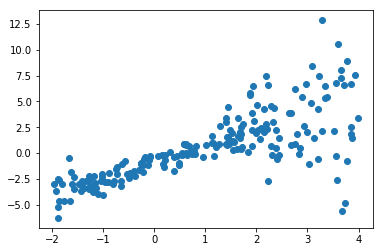

In [19]:
## create a random toy dataset for regression

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low = -2, high = 4, size = 200)
    y = []
    for t in x:
        r = np.random.normal(loc = 0.0,
                             scale = (0.5 + t * t/3),
                             size = None)
        y.append(r)
    return x, 1.726 * x - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')


### Executing objects in a TensorFlow graph using their names

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


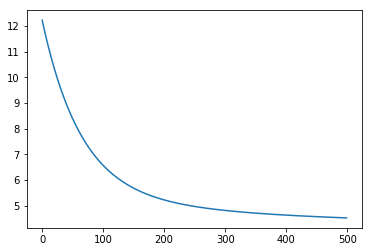

In [20]:
## train/test splits

x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

## training the model

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    ## first, run the variables initializer
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op],
                        feed_dict = {tf_x : x_train,
                                     tf_y : y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e,c))

plt.plot(training_costs)

Executing with variable names:

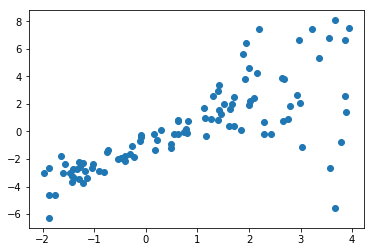

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


In [21]:
## train/test splits
x_train, y_train = x[:100], y[:100]
x_test, y_test = x[100:], y[100:]

## plot trainng data
plt.plot(x_train, y_train, 'o')
plt.show()

## training the model
n_epochs = 500
training_costs = []
with tf.Session(graph=g) as sess:
    ## first, run the variables initializer
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_eopchs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], # names!
                        feed_dict={'tf_x:0': x_train,
                                   'tf_y:0': y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e, c))

## Saving and restoring a model in TensorFlow

- once we exit the `tf.Session` environment, all the variables and their allocated memories are freed
- we need to save the trained model for future use, therefore,
- we adda a new node to the graph, an instance of the `tf.train.Saver` class
    - which we call `saver`

In [22]:
## add saver to the graph
with g.as_default():
    saver = tf.train.Saver()
    
## train the model
n_epochs = 500
training_costs = []

with tf.Session(graph = g) as sess:
    ## first, run the variables initialier
    sess.run(tf.global_variables_initializer())
    
    ## train the model for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(['cost:0','train_op'],
                        feed_dict = {'tf_x:0':x_train,
                                     'tf_y:0':y_train})
        training_costs.append(c)
        if not e % 50:
            print('Epoch %4d: %.4f' % (e,c))
    
    saver.save(sess,'./trained-model')
    
    ## as a result, three files are created with extensions .data, .index, .meta

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


Restoring the saved model:

1. Rebuild the graph that has the same nodes and names as the saved model 
 - all of the information is saved as metadata (.meta)


2. Restore the saved variables in a new `tf.Session` environment

In [23]:
## new file: loading a trained model
## and run the model on test set


g2 = tf.Graph()

with tf.Session(graph = g2) as sess:
    # load the .meta file, recreating the graph
    new_saver = tf.train.import_meta_graph(
        './trained-model.meta')
    # restore the parameters of the model in that session and execute it
    new_saver.restore(sess, './trained-model')
    
    y_pred = sess.run('y_hat:0',
                      feed_dict = {'tf_x:0' : x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


In [24]:
print('SSE: %.4f' % (np.sum(np.square(y_pred - y_test))))

SSE: 538.8118


INFO:tensorflow:Restoring parameters from ./trained-model


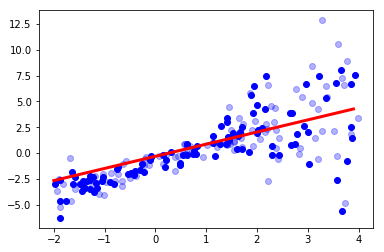

In [25]:
# visualize the prediction

x_arr = np.arange(-2,4,0.1)

g2 = tf.Graph()

with tf.Session(graph = g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    new_saver.restore(sess, './trained-model')
    
    y_arr = sess.run('y_hat:0', feed_dict = {'tf_x:0': x_arr})

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr.T[:, 0], '-r', lw=3)

## Transforming Tensors as multidimensional data arrays

- explore a selection of operators that can be used to transform tensors
- similar to `Numpy`
- But when dealing with tensors with ranks higher than 2, we need to be careful in using such transformations
    - e.g. transpose of a tensor

In [26]:
## tf.get_shape to get the shape of a Numpy array

import tensorflow as tf
import numpy as np

g = tf.Graph()

with g.as_default():
    arr = np.array([[1.,2.,3.,3.5],
                    [4.,5.,6.,6.5],
                    [7.,8.,9.,9.5]])
    T1 = tf.constant(arr, name = 'T1')
    print(T1)
    s = T1.get_shape()
    print('Shape of T1 is',s)
    T2 = tf.Variable(tf.random_normal(shape = s))
    print(T2)
    # cannot slice or idex s for creating T3
    # convert s into a regular Python list by s.as_list()
    T3 = tf.Variable(tf.random_normal(shape = (s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [27]:
# reshape tensors: tf.reshape

# one dimension can be set to -1
# the size of the new dimension will be inferred based on the total size of the array
# and the other remaining dimension(s) that are specified

with g.as_default():
    T4 = tf.reshape(T1, shape = [1,1,-1],
                    name = 'T4')
    print(T4)
    T5 = tf.reshape(T1, shape = [1,3,-1],
                    name = 'T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [28]:
with tf.Session(graph = g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [29]:
# transpose a tensor in TensorFlow: tf.transpose
# change the order of the dimensions in any way 
# by specifying the order in `perm = [...]`


with g.as_default():
    T6 = tf.transpose(T5, perm=[2,1,0],
                      name = 'T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0,2,1],
                      name = 'T7')
    print(T7)

Tensor("T6:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)


In [30]:
# split a tensor into a list of subtensors using the `tf.split`

with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2,axis=2,name='T8')
# the output is not a tensor object, but a list of tensors
    print(t5_split)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


In [31]:
# Concatenation of multiple tensors: tf.concat

g = tf.Graph()

with g.as_default():
    t1 = tf.ones(shape = (5,1),
                 dtype = tf.float32, name = 't1')
    t2 = tf.zeros(shape = (5,1),
                  dtype = tf.float32, name = 't2')
    print(t1)
    print(t2)

with g.as_default():
    t3 = tf.concat([t1,t2],axis=0,name='t3')
    print(t3)
    t4 = tf.concat([t1,t2],axis=1,name='t4')
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [32]:
with tf.Session(graph = g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Utilizing control flow mechanics in building graphs

There are some subtle differences when we use Python's control flow statements compared to TensorFlow's control flow functions, when constructing computation graphs

In [36]:
## Python control flow

x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32,
                          shape = None, name = 'tf_x')
    tf_y = tf.placeholder(dtype=tf.float32,
                          shape = None, name = 'tf_y')
    if x < y:
        res = tf.add(tf_x, tf_y, name = 'result_add')
    else:
        res = tf.subtract(tf_x, tf_y, name = 'result_sub')
    print('Object: ', res)
    
# the computation graph has only one branch associated with the addition operator,
# and the subtract operator has not been called
    
with tf.Session(graph=g) as sess:
    print('x<y: %s -> Result' % (x<y),
          res.eval(feed_dict={'tf_x:0':x,
                              'tf_y:0':y}))
    x, y = 2.0, 1.0
    # TensorFlow computation graph is static
    # once the compuatation graph is built
    # it remains unchanged during the execution process
    print('x<y: %s -> Result' % (x<y),
          res.eval(feed_dict={'tf_x:0':x,
                              'tf_y:0':y}))
    ## uncomment the next line if you want to visualize the graph in TensorBoard:
    file_writer = tf.summary.FileWriter(logdir='./logs/py-cflow/', graph=g)
    

Object:  Tensor("result_add:0", dtype=float32)
x<y: True -> Result 3.0
x<y: False -> Result 3.0


In [35]:
## TensorFlow control flow

x, y = 1.0, 2.0

g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32,
                          shape = None, name = 'tf_x')
    tf_y = tf.placeholder(dtype=tf.float32,
                          shape = None, name = 'tf_y')
    res = tf.cond(tf_x<tf_y,
                  lambda: tf.add(tf_x, tf_y,
                                 name = 'result_add'),
                  lambda: tf.subtract(tf_x, tf_y,
                                       name = 'result_sub'))
    print('Object:', res)
    
with tf.Session(graph = g) as sess:
    print('x<y: %s -> Result:' % (x<y),
          res.eval(feed_dict = {'tf_x:0':x,
                                'tf_y:0':y}))
    x, y = 2.0, 1.0
    # the `res` object is named "cond/Merge: 0"
    # the computation graph has two branches with a mechanism to decide
    # which branch to follow at execution time
    
    print('x<y: %s -> Result:' % (x<y),
          res.eval(feed_dict = {'tf_x:0':x,
                                'tf_y:0':y}))
    

Object: Tensor("cond/Merge:0", dtype=float32)
x<y: True -> Result: 3.0
x<y: False -> Result: 1.0


## Visualizing the graph with TensorBoard

In [37]:
import tensorflow as tf


###########################
##   Helper functions    ##
###########################

def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(name = 'weights',
                              shape=(data_shape[1],
                                     n_classes),
                              dtype=tf.float32)
    bias = tf.get_variable(name='bias', 
                           initializer=tf.zeros(
                                     shape=n_classes))
    print(weights)
    print(bias)
    logits = tf.add(tf.matmul(data, weights), 
                    bias, 
                    name='logits')
    print(logits)
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(
        tf.random_normal(shape=(data_shape[1], 
                                n_hidden)),
        name='w1')
    b1 = tf.Variable(tf.zeros(shape=n_hidden),
                     name='b1')
    hidden = tf.add(tf.matmul(data, w1), b1, 
                    name='hidden_pre-activation')
    hidden = tf.nn.relu(hidden, 'hidden_activation')
        
    w2 = tf.Variable(
        tf.random_normal(shape=(n_hidden, 
                                data_shape[1])),
        name='w2')
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]),
                     name='b2')
    output = tf.add(tf.matmul(hidden, w2), b2, 
                    name = 'output')
    return output, tf.nn.sigmoid(output)


###########################
##  Building the graph   ##
###########################

batch_size=64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), 
                          dtype=tf.float32,
                          name='tf_X')
    
    ## build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(data=tf_X, 
                                   n_hidden=50)
    
    ## build the classifier
    with tf.variable_scope('classifier') as scope:
        ## classifier for the original data:
        cls_out1 = build_classifier(data=tf_X, 
                                    labels=tf.ones(
                                        shape=batch_size))
        
        ## reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1],
                                    labels=tf.zeros(
                                        shape=batch_size))

        
with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    
    file_writer = tf.summary.FileWriter(logdir='logs/', graph=g)



<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32_ref>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32_ref>
Tensor("classifier/logits:0", shape=(64, 2), dtype=float32)
<tf.Variable 'classifier/weights:0' shape=(100, 2) dtype=float32_ref>
<tf.Variable 'classifier/bias:0' shape=(2,) dtype=float32_ref>
Tensor("classifier/logits_1:0", shape=(64, 2), dtype=float32)
